In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Apple's financial data page
url = "https://finance.yahoo.com/quote/AAPL/financials?p=AAPL"

# Send an HTTP GET request to the URL
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, "html.parser")
#print(soup.prettify())

In [3]:
apple = soup.find(class_='finContainer yf-9ft13').get_text(strip=True)
print(apple)


BreakdownTTM9/30/20249/30/20239/30/20229/30/2021Total Revenue395,760,000.00391,035,000.00383,285,000.00394,328,000.00365,817,000.00Cost of Revenue211,657,000.00210,352,000.00214,137,000.00223,546,000.00212,981,000.00Gross Profit184,103,000.00180,683,000.00169,148,000.00170,782,000.00152,836,000.00Operating Expense58,428,000.0057,467,000.0054,847,000.0051,345,000.0043,887,000.00Operating Income125,675,000.00123,216,000.00114,301,000.00119,437,000.00108,949,000.00Net Non Operating Interest Income Expense-----183,000.00-106,000.00198,000.00Other Income Expense71,000.00269,000.00-565,000.00-334,000.0060,000.00Pretax Income125,746,000.00123,485,000.00113,736,000.00119,103,000.00109,207,000.00Tax Provision29,596,000.0029,749,000.0016,741,000.0019,300,000.0014,527,000.00Net Income Common Stockholders96,150,000.0093,736,000.0096,995,000.0099,803,000.0094,680,000.00Diluted NI Available to Com Stockholders96,150,000.0093,736,000.0096,995,000.0099,803,000.0094,680,000.00Basic EPS6.336.116.166.155

In [5]:
import pandas as pd
import csv

# Define the header and data
header = ['Breakdown', 'TTM', '9/30/2024', '9/30/2023', '9/30/2022', '9/30/2021']
data = [
    ['Total Revenue', '391,035,000.00', '391,035,000.00', '383,285,000.00', '394,328,000.00', '365,817,000.00'],
    ['Cost of Revenue', '210,352,000.00', '210,352,000.00', '214,137,000.00', '223,546,000.00', '212,981,000.00'],
    ['Gross Profit', '180,683,000.00', '180,683,000.00', '169,148,000.00', '170,782,000.00', '152,836,000.00'],
    ['Operating Expense', '57,467,000.00', '57,467,000.00', '54,847,000.00', '51,345,000.00', '43,887,000.00'],
    ['Operating Income', '123,216,000.00', '123,216,000.00', '114,301,000.00', '119,437,000.00', '108,949,000.00'],
    ['Net Non Operating Interest Income Expense', '-----', '183,000.00', '-106,000.00', '198,000.00', '-----'],
    ['Other Income Expense', '269,000.00', '269,000.00', '-565,000.00', '-334,000.00', '60,000.00'],
    ['Pretax Income', '123,485,000.00', '123,485,000.00', '113,736,000.00', '119,103,000.00', '109,207,000.00'],
    ['Tax Provision', '29,749,000.00', '29,749,000.00', '16,741,000.00', '19,300,000.00', '14,527,000.00'],
    ['Net Income Common Stockholders', '93,736,000.00', '93,736,000.00', '96,995,000.00', '99,803,000.00', '94,680,000.00'],
    ['Diluted NI Available to Com Stockholders', '93,736,000.00', '93,736,000.00', '96,995,000.00', '99,803,000.00', '94,680,000.00'],
    ['Basic EPS', '6.11', '--', '6.16', '6.15', '5.67'],
    ['Diluted EPS', '6.08', '--', '6.13', '6.11', '5.61'],
    ['Basic Average Shares', '15,343,783.00', '--', '15,744,231.00', '16,215,963.00', '16,701,272.00'],
    ['Diluted Average Shares', '15,408,095.00', '--', '15,812,547.00', '16,325,819.00', '16,864,919.00'],
    ['Total Operating Income as Reported', '123,216,000.00', '123,216,000.00', '114,301,000.00', '119,437,000.00', '108,949,000.00'],
    ['Total Expenses', '267,819,000.00', '267,819,000.00', '268,984,000.00', '274,891,000.00', '256,868,000.00'],
    ['Net Income from Continuing & Discontinued Operation', '93,736,000.00', '93,736,000.00', '96,995,000.00', '99,803,000.00', '94,680,000.00'],
    ['Normalized Income', '93,736,000.00', '93,736,000.00', '96,995,000.00', '99,803,000.00', '94,680,000.00'],
    ['Interest Income', '----', '3,750,000.00', '2,825,000.00', '2,843,000.00', '----'],
    ['Interest Expense', '----', '3,933,000.00', '2,931,000.00', '2,645,000.00', '----'],
    ['Net Interest Income', '-----', '183,000.00', '-106,000.00', '198,000.00', '-----'],
    ['EBIT', '123,216,000.00', '123,216,000.00', '114,301,000.00', '119,437,000.00', '111,852,000.00'],
    ['EBITDA', '134,661,000.00', '134,661,000.00', '125,820,000.00', '130,541,000.00', '123,136,000.00'],
    ['Reconciled Cost of Revenue', '210,352,000.00', '210,352,000.00', '214,137,000.00', '223,546,000.00', '212,981,000.00'],
    ['Reconciled Depreciation', '11,445,000.00', '11,445,000.00', '11,519,000.00', '11,104,000.00', '11,284,000.00'],
    ['Net Income from Continuing Operation Net Minority Interest', '93,736,000.00', '93,736,000.00', '96,995,000.00', '99,803,000.00', '94,680,000.00'],
    ['Normalized EBITDA', '134,661,000.00', '134,661,000.00', '125,820,000.00', '130,541,000.00', '123,136,000.00'],
    ['Tax Rate for Calcs', '0.000', '0.000', '0.000', '0.000', '0.000']
]

# Clean the data: Strip whitespace from strings
clean_data = [[str(item).strip() if isinstance(item, str) else item for item in row] for row in data]

# Create DataFrame
df = pd.DataFrame(clean_data, columns=header)

# Write to CSV file
df.to_csv('AppleWebScraperDataset.csv', index=False, encoding='UTF-8')

# Output the DataFrame for verification
print(df)


                                            Breakdown             TTM  \
0                                       Total Revenue  391,035,000.00   
1                                     Cost of Revenue  210,352,000.00   
2                                        Gross Profit  180,683,000.00   
3                                   Operating Expense   57,467,000.00   
4                                    Operating Income  123,216,000.00   
5           Net Non Operating Interest Income Expense           -----   
6                                Other Income Expense      269,000.00   
7                                       Pretax Income  123,485,000.00   
8                                       Tax Provision   29,749,000.00   
9                      Net Income Common Stockholders   93,736,000.00   
10           Diluted NI Available to Com Stockholders   93,736,000.00   
11                                          Basic EPS            6.11   
12                                        Diluted E

In [7]:
import pandas as pd
df = pd.read_csv(r'/Users/user/AppleWebScraperDataset.csv')
df

,Breakdown,TTM,9/30/2024,9/30/2023,9/30/2022,9/30/2021
0,Total Revenue,"391,035,000.00","391,035,000.00","383,285,000.00","394,328,000.00","365,817,000.00"
1,Cost of Revenue,"210,352,000.00","210,352,000.00","214,137,000.00","223,546,000.00","212,981,000.00"
2,Gross Profit,"180,683,000.00","180,683,000.00","169,148,000.00","170,782,000.00","152,836,000.00"
3,Operating Expense,"57,467,000.00","57,467,000.00","54,847,000.00","51,345,000.00","43,887,000.00"
4,Operating Income,"123,216,000.00","123,216,000.00","114,301,000.00","119,437,000.00","108,949,000.00"
5,Net Non Operating Interest Income Expense,-----,"183,000.00","-106,000.00","198,000.00",-----
6,Other Income Expense,"269,000.00","269,000.00","-565,000.00","-334,000.00","60,000.00"
7,Pretax Income,"123,485,000.00","123,485,000.00","113,736,000.00","119,103,000.00","109,207,000.00"
8,Tax Provision,"29,749,000.00","29,749,000.00","16,741,000.00","19,300,000.00","14,527,000.00"
9,Net Income Common Stockholders,"93,736,000.00","93,736,000.00","96,995,000.00","99,803,000.00","94,680,000.00"


In [9]:
#. How year-over-year(YoY) revenue growth trended, and what factors explained fluctuations
import pandas as pd

# Sample Data for factors and revenue
data = {
    'Breakdown': ['Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Income', 'Net Income'],
    '9/30/2024': [391035000, 210352000, 180683000, 123216000, 93736000], 
    '9/30/2023': [383285000, 214137000, 169148000, 114301000, 96995000], 
    '9/30/2022': [394328000, 223546000, 170782000, 119437000, 99803000],
    '9/30/2021': [365817000, 212981000, 152836000, 108949000, 94680000]
}

# Create DataFrame and transpose
df = pd.DataFrame(data)
df = df.set_index('Breakdown').T

# Calculate Growth Percentage for selected factors
df['Revenue Growth (%)'] = df['Total Revenue'].pct_change() * 100
df['Cost Growth (%)'] = df['Cost of Revenue'].pct_change() * 100
df['Gross Profit Growth (%)'] = df['Gross Profit'].pct_change() * 100
df['Operating Income Growth (%)'] = df['Operating Income'].pct_change() * 100
df['Net Income Growth (%)'] = df['Net Income'].pct_change() * 100

# Display the DataFrame with selected factors
print(df[['Revenue Growth (%)', 'Cost Growth (%)', 'Gross Profit Growth (%)', 'Operating Income Growth (%)', 'Net Income Growth (%)']])


Breakdown  Revenue Growth (%)  Cost Growth (%)  Gross Profit Growth (%)  \
9/30/2024                 NaN              NaN                      NaN   
9/30/2023           -1.981920         1.799365                -6.384109   
9/30/2022            2.881146         4.393916                 0.966018   
9/30/2021           -7.230275        -4.726097               -10.508133   

Breakdown  Operating Income Growth (%)  Net Income Growth (%)  
9/30/2024                          NaN                    NaN  
9/30/2023                    -7.235262               3.476786  
9/30/2022                     4.493399               2.894995  
9/30/2021                    -8.781198              -5.133112  


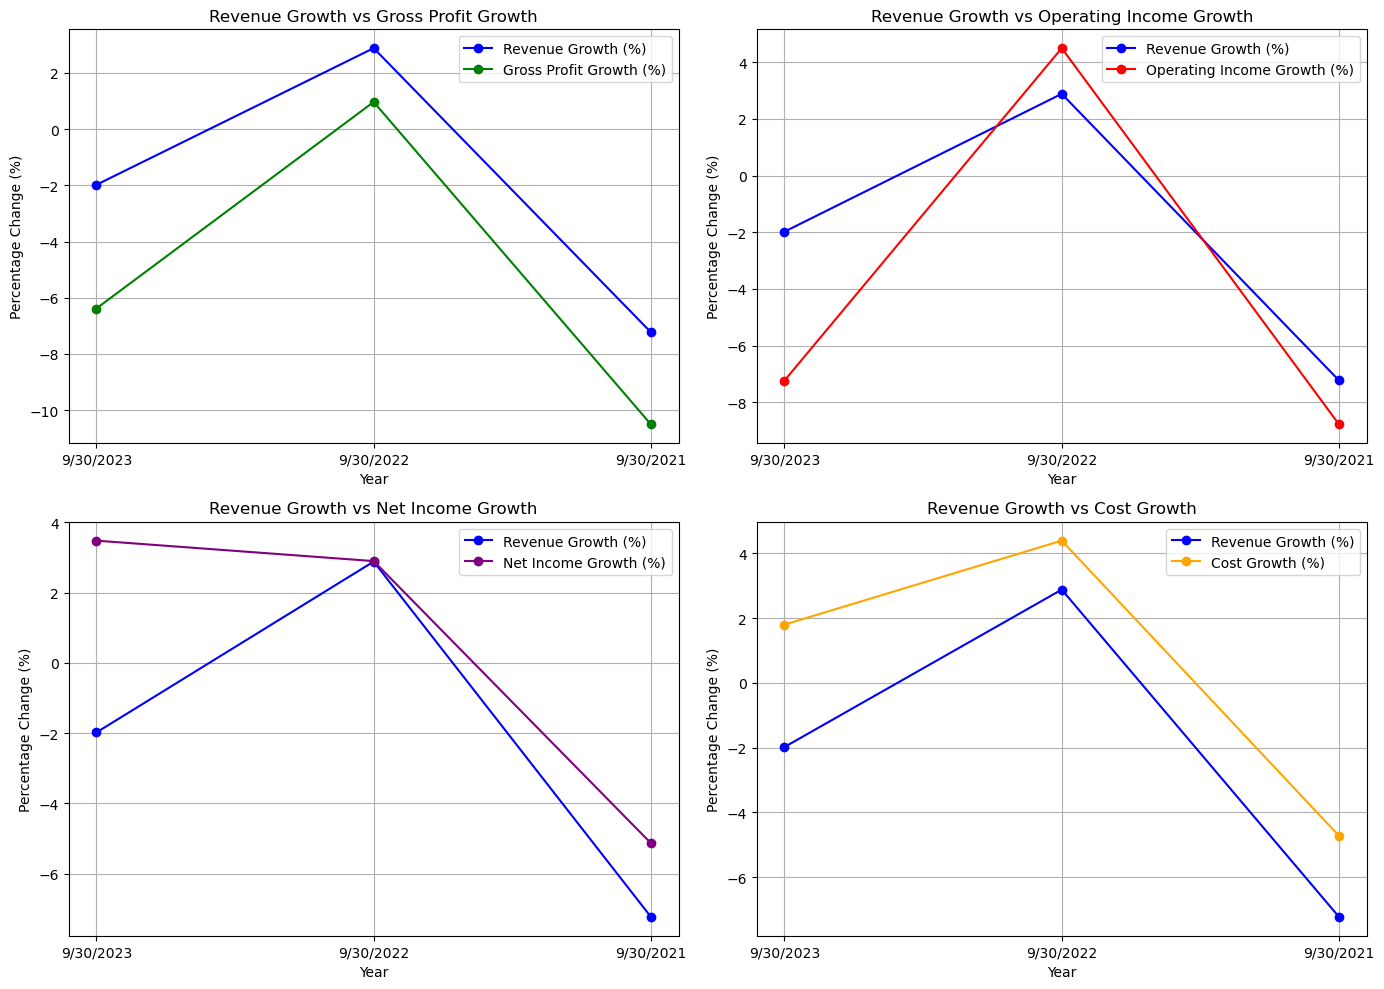

In [11]:
import matplotlib.pyplot as plt

# Visualizing Separately: Each factor and its relation to revenue growth
plt.figure(figsize=(14, 10))

# Plotting Revenue Growth vs Gross Profit Growth
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='blue')
plt.plot(df.index, df['Gross Profit Growth (%)'], label='Gross Profit Growth (%)', marker='o', color='green')
plt.title('Revenue Growth vs Gross Profit Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)

# Plotting Revenue Growth vs Operating Income Growth
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='blue')
plt.plot(df.index, df['Operating Income Growth (%)'], label='Operating Income Growth (%)', marker='o', color='red')
plt.title('Revenue Growth vs Operating Income Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)

# Plotting Revenue Growth vs Net Income Growth
plt.subplot(2, 2, 3)
plt.plot(df.index, df['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='blue')
plt.plot(df.index, df['Net Income Growth (%)'], label='Net Income Growth (%)', marker='o', color='purple')
plt.title('Revenue Growth vs Net Income Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)

# Plotting Revenue Growth vs Cost Growth
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='blue')
plt.plot(df.index, df['Cost Growth (%)'], label='Cost Growth (%)', marker='o', color='orange')
plt.title('Revenue Growth vs Cost Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


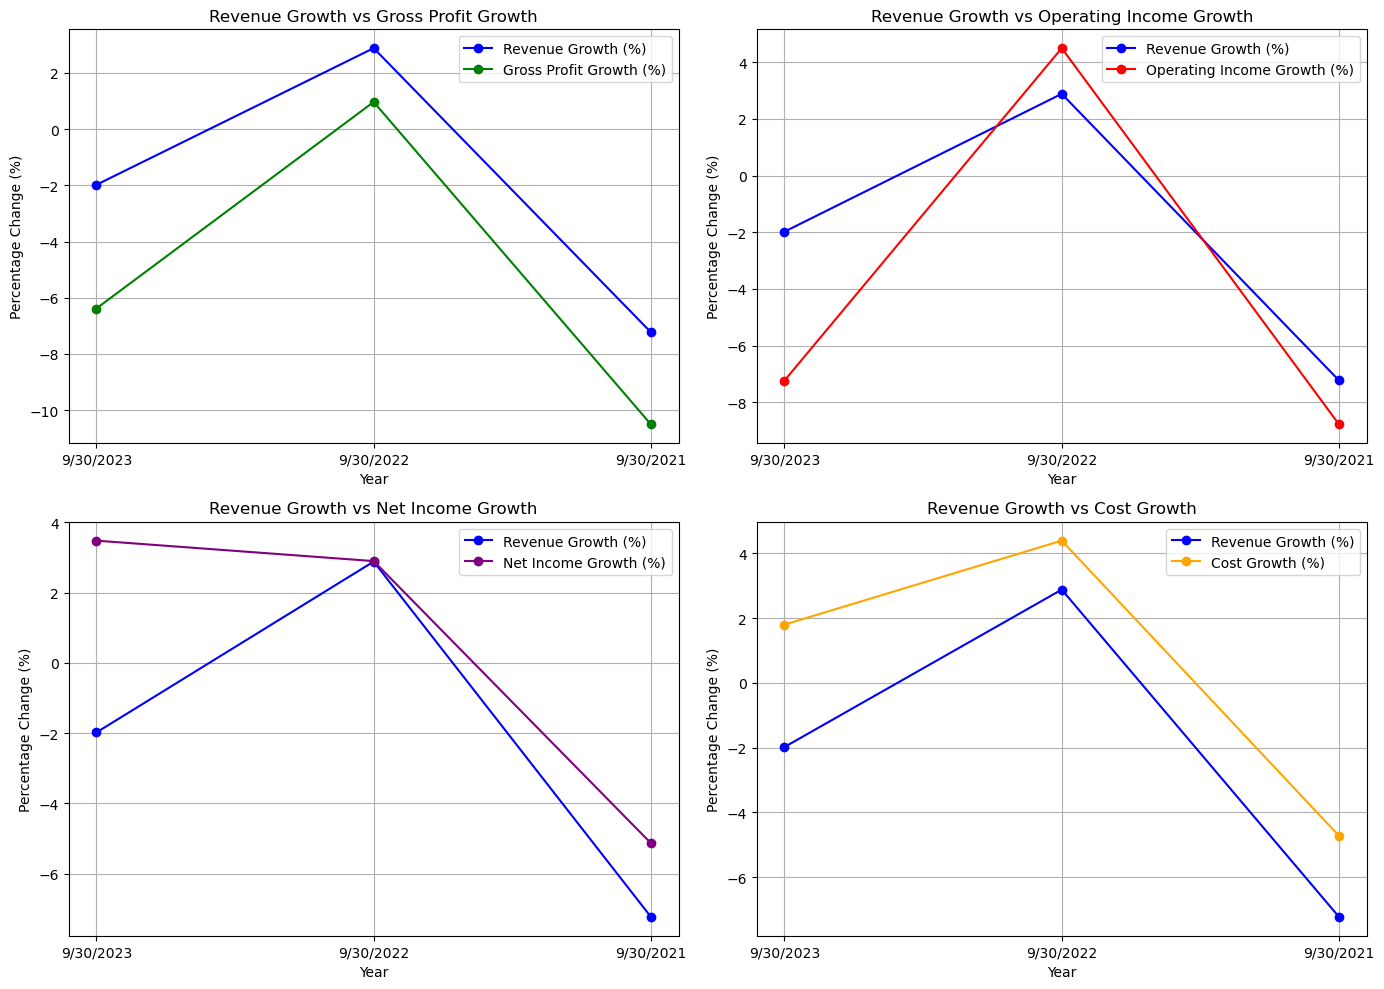

In [11]:
import matplotlib.pyplot as plt

# Visualizing Separately: Each factor and its relation to revenue growth
plt.figure(figsize=(14, 10))

# Plotting Revenue Growth vs Gross Profit Growth
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='blue')
plt.plot(df.index, df['Gross Profit Growth (%)'], label='Gross Profit Growth (%)', marker='o', color='green')
plt.title('Revenue Growth vs Gross Profit Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)

# Plotting Revenue Growth vs Operating Income Growth
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='blue')
plt.plot(df.index, df['Operating Income Growth (%)'], label='Operating Income Growth (%)', marker='o', color='red')
plt.title('Revenue Growth vs Operating Income Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)

# Plotting Revenue Growth vs Net Income Growth
plt.subplot(2, 2, 3)
plt.plot(df.index, df['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='blue')
plt.plot(df.index, df['Net Income Growth (%)'], label='Net Income Growth (%)', marker='o', color='purple')
plt.title('Revenue Growth vs Net Income Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)

# Plotting Revenue Growth vs Cost Growth
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='blue')
plt.plot(df.index, df['Cost Growth (%)'], label='Cost Growth (%)', marker='o', color='orange')
plt.title('Revenue Growth vs Cost Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [13]:
# Calculate correlation between Revenue Growth and other factors
correlation_matrix = df[['Revenue Growth (%)', 'Gross Profit Growth (%)', 
                         'Operating Income Growth (%)', 'Net Income Growth (%)', 
                         'Cost Growth (%)']].corr()

# Display correlations of each factor with Revenue Growth
print(correlation_matrix['Revenue Growth (%)'].sort_values(ascending=False))


Breakdown
Revenue Growth (%)             1.000000
Gross Profit Growth (%)        0.983316
Cost Growth (%)                0.975481
Operating Income Growth (%)    0.905216
Net Income Growth (%)          0.846141
Name: Revenue Growth (%), dtype: float64


In [15]:
df['Operating Expense'] = [57467000.00, 54847000.00, 51345000.00, 43887000.00]

# Calculate Operating Margin
df['Operating Margin (%)'] = (df['Operating Income'] / df['Total Revenue']) * 100

# Select relevant cost components for correlation analysis
cost_factors = ['Cost of Revenue', 'Operating Expense']
df_cost_analysis = df[['Operating Margin (%)'] + cost_factors]
print(df_cost_analysis)

Breakdown  Operating Margin (%)  Cost of Revenue  Operating Expense
9/30/2024             31.510223        210352000         57467000.0
9/30/2023             29.821412        214137000         54847000.0
9/30/2022             30.288744        223546000         51345000.0
9/30/2021             29.782378        212981000         43887000.0


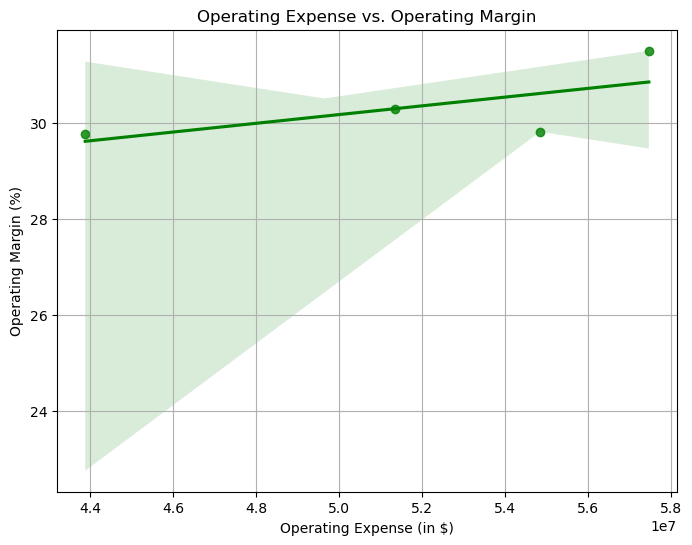

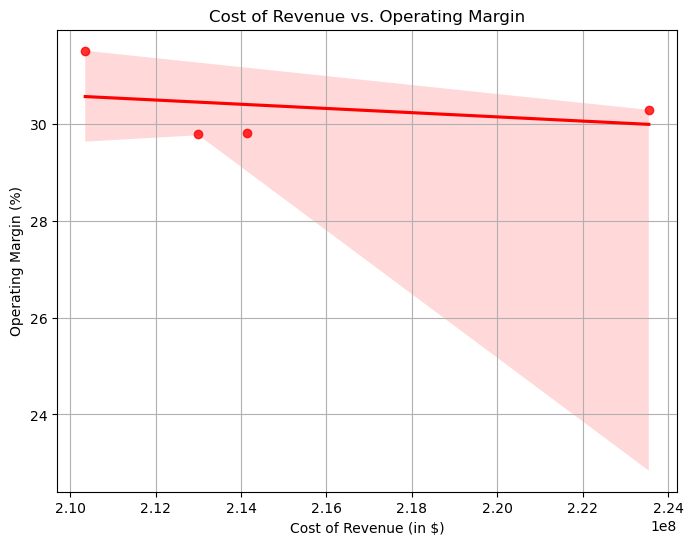

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data setup
data = {
    'Breakdown': ['9/30/2024', '9/30/2023', '9/30/2022', '9/30/2021'],
    'Operating Margin (%)': [31.510223, 29.821412, 30.288744, 29.782378],
    'Cost of Revenue': [210352000, 214137000, 223546000, 212981000],
    'Operating Expense': [57467000.00, 54847000.00, 51345000.00, 43887000.00]
}

df = pd.DataFrame(data)

# Scatter Plot with Trendline (Operating Expense vs. Operating Margin)
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Operating Expense'], y=df['Operating Margin (%)'], color='g')
plt.title('Operating Expense vs. Operating Margin')
plt.xlabel('Operating Expense (in $)')
plt.ylabel('Operating Margin (%)')
plt.grid()
plt.show()

# Scatter Plot with Trendline (Cost of Revenue vs. Operating Margin)
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Cost of Revenue'], y=df['Operating Margin (%)'], color='r')
plt.title('Cost of Revenue vs. Operating Margin')
plt.xlabel('Cost of Revenue (in $)')
plt.ylabel('Operating Margin (%)')
plt.grid()
plt.show()


In [27]:
# Calculate the correlation matrix
correlation_matrix = df_cost_analysis.corr()

# Extract correlations with Operating Margin
operating_margin_correlation = correlation_matrix['Operating Margin (%)'].sort_values(ascending=False)

# Display the results
print(operating_margin_correlation)


Breakdown
Operating Margin (%)    1.000000
Operating Expense       0.665083
Cost of Revenue        -0.310107
Name: Operating Margin (%), dtype: float64
